## DotA 2 EDA

TBD

__Content__
1. Into
2. Setup
3. Data exploration
4. Primary data analysis
5. Geting insights
6. Predictive analysis

In [66]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import os

### Data exploration

Для начала давайте изучим содержимое файлов. Получаем список файлов в директории:

In [3]:
os.listdir('../archive')

['ability_ids.csv',
 'ability_upgrades.csv',
 'chat.csv',
 'cluster_regions.csv',
 'hero_names.csv',
 'item_ids.csv',
 'match.csv',
 'match_outcomes.csv',
 'objectives.csv',
 'patch_dates.csv',
 'players.csv',
 'player_ratings.csv',
 'player_time.csv',
 'purchase_log.csv',
 'teamfights.csv',
 'teamfights_players.csv',
 'test_labels.csv',
 'test_player.csv',
 'yasp_sample.json']

In [30]:
df_ability_ids = pd.read_csv('../archive/ability_ids.csv')
df_ability_ids.head(10)

,ability_id,ability_name
0,0,ability_base
1,5001,default_attack
2,5002,attribute_bonus
3,5003,antimage_mana_break
4,5004,antimage_blink
5,5005,antimage_spell_shield
6,5006,antimage_mana_void
7,5007,axe_berserkers_call
8,5008,axe_battle_hunger
9,5009,axe_counter_helix


In [34]:
len(df_ability_ids)

688

Меппинг id способности и его полное названия. Итого у нас есть 688 разных способностей

In [38]:
df_ability_upgrades = pd.read_csv('../archive/ability_upgrades.csv')
df_ability_upgrades.head(10)

,ability,level,time,player_slot,match_id
0,5448,1,326,0,0
1,5450,2,452,0,0
2,5450,3,582,0,0
3,5448,4,804,0,0
4,5450,5,916,0,0
5,5452,6,1077,0,0
6,5450,7,1222,0,0
7,5448,8,1380,0,0
8,5448,9,1554,0,0
9,5451,10,1694,0,0


В Доте 2 при каждом повышении уровня можно прокачать одну способность. <br>
На 6 можно открыть ульту - чаще всего это самая сильная способность способная изменить ход битвы. При анализе будет полезно узнать время открытая ульты.<br>
Данная таблица показывает в каком порядке и в какое время качали свои способности герои<br>

In [48]:
df_chat = pd.read_csv('../archive/chat.csv')
df_chat.head(10)

,match_id,key,slot,time,unit
0,0,force it,6,-8,6k Slayer
1,0,space created,1,5,Monkey
2,0,hah,1,6,Monkey
3,0,ez 500,6,9,6k Slayer
4,0,mvp ulti,4,934,Kira
5,0,bye,6,1486,6k Slayer
6,0,hah,1,1488,Monkey
7,0,fate,6,1496,6k Slayer
8,0,is cruel,6,1502,6k Slayer
9,0,fuck my ass,0,1524,Double T


Сообщения из чата зачастую бывают забавными

In [52]:
df_cluster_regions = pd.read_csv('../archive/cluster_regions.csv')
df_cluster_regions.head(5)

,cluster,region
0,111,US WEST
1,112,US WEST
2,113,US WEST
3,121,US EAST
4,122,US EAST


Меппинг кластера и его названия

In [53]:
df_hero_names = pd.read_csv('../archive/hero_names.csv')
df_hero_names.head(10)

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden
5,npc_dota_hero_drow_ranger,6,Drow Ranger
6,npc_dota_hero_earthshaker,7,Earthshaker
7,npc_dota_hero_juggernaut,8,Juggernaut
8,npc_dota_hero_mirana,9,Mirana
9,npc_dota_hero_morphling,10,Morphling


Меппинг системного названия, id и имени героя

In [54]:
df_item_ids = pd.read_csv('../archive/item_ids.csv')
df_item_ids.head(10)

,item_id,item_name
0,1,blink
1,2,blades_of_attack
2,3,broadsword
3,4,chainmail
4,5,claymore
5,6,helm_of_iron_will
6,7,javelin
7,8,mithril_hammer
8,9,platemail
9,10,quarterstaff


Меппинг айди вещи и его имени

In [56]:
df_match = pd.read_csv('../archive/match.csv')
df_match.head(10)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156
5,5,1446798766,1574,2047,4,3,63,113,22,True,0,0,155
6,6,1446800938,2124,1972,0,3,63,4,22,True,0,0,151
7,7,1446804030,2328,2046,0,0,63,255,22,True,0,0,138
8,8,1446819063,2002,0,1982,63,0,4,22,False,0,0,182
9,9,1446837251,2961,0,1972,63,0,85,22,False,0,0,133


В данной таблице уже намного больше информации.
`match_id` номер матча <br>
`start_time` начало <br>
Дальше уже пошла механика игры. Как упоминало ранее, цель игры это завалить главное строение противника.<br>
`tower_status_radiant` статус защитных башен <br>
`tower_status_dire`  <br>
`barracks_status_dire` <br>
`barracks_status_radiant` <br>
`first_blood_time` <br>
`game_mode` <br>
`radiant_win` <br>
`negative_votes` <br>
`positive_votes` <br>
`cluster` <br>
По итогу, в данной таблице представлены результаты матча

In [58]:
df_match_outcomes = pd.read_csv('../archive/match_outcomes.csv')
df_match_outcomes.head(10)

,match_id,account_id_0,account_id_1,account_id_2,account_id_3,account_id_4,start_time,parser_version,win,rad
0,1636204962,34549,0,0,-51743434,-120875154,1437014585,12,1,0
1,1636204962,0,61598,138825,0,207232,1437014585,12,0,1
2,1636322679,0,-44943233,-240360907,19599,0,1437019968,12,0,0
3,1636322679,-97530201,0,0,0,-116349387,1437019968,12,1,1
4,1637385965,0,0,0,104738,0,1437052551,12,1,0
5,1637385965,0,0,278620,278619,0,1437052551,12,0,1
6,1637623870,-123447796,68408,-100048908,-16784805,320715,1437058007,12,1,0
7,1637623870,-108454938,-251819996,0,51172,-106710926,1437058007,12,0,1
8,1637739731,320093,0,178850,-45490226,-119392638,1437060903,12,0,0
9,1637739731,0,241925,-115963827,14072,-67386586,1437060903,12,1,1


Таблица по списком игроков

In [59]:
df_objectives = pd.read_csv('../archive/objectives.csv')
df_objectives.head(10)

,match_id,key,player1,player2,slot,subtype,team,time,value
0,0,NaN,0,6,0.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,1,309
1,0,NaN,3,-1,3.0,CHAT_MESSAGE_TOWER_KILL,2.0,894,2
2,0,NaN,2,-1,NaN,CHAT_MESSAGE_ROSHAN_KILL,2.0,925,200
3,0,NaN,1,-1,1.0,CHAT_MESSAGE_AEGIS,NaN,925,0
4,0,NaN,7,-1,7.0,CHAT_MESSAGE_TOWER_KILL,3.0,1016,3
5,0,NaN,3,-1,3.0,CHAT_MESSAGE_TOWER_KILL,2.0,1024,2
6,0,NaN,-1,-1,-1.0,CHAT_MESSAGE_TOWER_KILL,2.0,1446,2
7,0,NaN,4,-1,4.0,CHAT_MESSAGE_TOWER_KILL,2.0,1590,2
8,0,NaN,2,-1,NaN,CHAT_MESSAGE_ROSHAN_KILL,2.0,1740,200
9,0,NaN,1,-1,1.0,CHAT_MESSAGE_AEGIS,NaN,1740,0


In [61]:
df_objectives["subtype"].unique()

array(['CHAT_MESSAGE_FIRSTBLOOD', 'CHAT_MESSAGE_TOWER_KILL',
       'CHAT_MESSAGE_ROSHAN_KILL', 'CHAT_MESSAGE_AEGIS',
       'CHAT_MESSAGE_BARRACKS_KILL', 'CHAT_MESSAGE_TOWER_DENY',
       'CHAT_MESSAGE_AEGIS_STOLEN'], dtype=object)

В данной таблица представлены системые события. Такие вещи как первая кровь или убийство Рошана могут сильно повлять на дальнейшую игру

In [63]:
df_patch_dates = pd.read_csv('../archive/patch_dates.csv')
df_patch_dates.head(10)

,patch_date,name
0,2010-12-24T00:00:00Z,6.70
1,2011-01-21T00:00:00Z,6.71
2,2011-04-27T00:00:00Z,6.72
3,2011-12-24T00:00:00Z,6.73
4,2012-03-10T00:00:00Z,6.74
5,2012-09-30T00:00:00Z,6.75
6,2012-10-21T00:00:00Z,6.76
7,2012-12-15T00:00:00Z,6.77
8,2013-05-30T00:00:00Z,6.78
9,2013-11-24T00:00:00Z,6.79


Данные про патчи игры

In [72]:
df_players = pd.read_csv('../archive/players.csv')
df_players.head(15)

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,level,leaver_status,xp_hero,xp_creep,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,unit_order_none,unit_order_move_to_position,unit_order_move_to_target,unit_order_attack_move,unit_order_attack_target,unit_order_cast_position,unit_order_cast_target,unit_order_cast_target_tree,unit_order_cast_no_target,unit_order_cast_toggle,unit_order_hold_position,unit_order_train_ability,unit_order_drop_item,unit_order_give_item,unit_order_pickup_item,unit_order_pickup_rune,unit_order_purchase_item,unit_order_sell_item,unit_order_disassemble_item,unit_order_move_item,unit_order_cast_toggle_auto,unit_order_stop,unit_order_taunt,unit_order_buyback,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143,180,37,73,56,108,0,16,0,8840.0,5440.0,NaN,83.0,50.0,-957.0,NaN,NaN,212.0,3120.0,5145.0,1087.0,400.0,NaN,NaN,4070.0,1.0,25.0,416.0,51.0,144.0,3.0,71.0,NaN,188.0,16.0,NaN,NaN,NaN,2.0,35.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423,46,63,119,102,24,108,22,0,14331.0,8440.0,2683.0,671.0,395.0,-1137.0,NaN,NaN,1650.0,3299.0,6676.0,4317.0,937.0,NaN,NaN,5894.0,214.0,165.0,1031.0,98.0,39.0,4.0,439.0,NaN,346.0,22.0,NaN,NaN,12.0,52.0,30.0,4.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399,48,60,59,108,65,0,17,0,6692.0,8112.0,NaN,453.0,259.0,-1436.0,-1015.0,NaN,NaN,3142.0,2418.0,3697.0,400.0,NaN,NaN,7053.0,3.0,132.0,645.0,36.0,160.0,20.0,373.0,NaN,643.0,17.0,5.0,NaN,7.0,8.0,28.0,NaN,1.0,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,19,6,271,None,14832,2714,6055,63,147,154,164,79,160,21,0,8583.0,14230.0,894.0,293.0,100.0,-2156.0,NaN,NaN,938.0,4714.0,4104.0,10432.0,400.0,NaN,NaN,4712.0,133.0,163.0,690.0,9.0,15.0,7.0,406.0,NaN,150.0,21.0,NaN,NaN,1.0,9.0,45.0,7.0,NaN,14.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,17,13,245,None,33740,243,1833,114,92,147,0,137,63,24,0,15814.0,14325.0,NaN,62.0,NaN,-1437.0,-1056.0,NaN,4194.0,3217.0,7467.0,9220.0,400.0,NaN,NaN,3853.0,7.0,7.0,1173.0,31.0,84.0,8.0,198.0,NaN,111.0,23.0,1.0,NaN,NaN,2.0,44.0,6.0,NaN,13.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
5,0,4,106,128,476,12285,397,524,5,6,8,5,162,None,10725,0,112,145,73,149,48,212,0,19,0,8502.0,12259.0,NaN,1.0,NaN,-2394.0,-2240.0,NaN,200.0,320.0,5281.0,6193.0,NaN,NaN,NaN,6593.0,166.0,76.0,832.0,196.0,3.0,5.0,96.0,2.0,161.0,19.0,NaN,NaN,2.0,NaN,36.0,3.0,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
6,0,0,102,129,317,10355,303,369,4,13,5,2,107,None,15028,764,0,50,11,102,36,185,81,16,0,5201.0,9417.0,NaN,1.0,NaN,-3287.0,NaN,NaN,262.0,320.0,3396.0,4356.0,NaN,NaN,NaN,3325.0,63.0,100.0,609.0,13.0,173.0,14.0,168.0,NaN,118.0,16.0,NaN,NaN,1.0,1.0,43.0,3.0,NaN,13.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,0,5,46,130,2390,13395,452,517,4,8,6,31,208,None,10230,0,2438,41,63,36,147,168,21,19,0,6853.0,13396.0,NaN,244.0,107.0,-3682.0,NaN,NaN,242.0,695.0,4350.0,8797.0,NaN,NaN,NaN,13557.0,11.0,214.0,3386.0,122.0,NaN,3.0,506.0,NaN,491.0,18.0,2.0,3.0,18.0,18.0,30.0,1.0,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,110.0,NaN,NaN,NaN,NaN,NaN
8,0,0,7,131,475,5035,189,223,1,14,8,0,27,67.0277,4774,0,0,36,0,0,46,0,180,12,0,4798.0,4038.0,NaN,27.0,NaN,-3286.0,-39.0,NaN,NaN,320.0,2127.0,1089.0,NaN,NaN,NaN,2217.0,55.

Данные об игроках под конец игры

In [74]:
df_player_ratings = pd.read_csv('../archive/player_ratings.csv')
df_player_ratings.head(10)

,account_id,total_wins,total_matches,trueskill_mu,trueskill_sigma
0,236579,14,24,27.868035,5.212361
1,-343,1,1,26.544163,8.065475
2,-1217,1,1,26.521103,8.114989
3,-1227,1,1,27.248025,8.092217
4,-1284,0,1,22.931016,8.092224
5,308663,1,1,26.761476,8.108880
6,79749,21,40,30.553417,3.868734
7,-1985,0,1,23.263409,8.098020
8,-2160,8,12,27.426018,6.391300
9,26500,26,50,27.943621,4.049005


Профили игроков

In [76]:
df_player_time = pd.read_csv('../archive/player_time.csv')
df_player_time.head(10)

,match_id,times,gold_t_0,lh_t_0,xp_t_0,gold_t_1,lh_t_1,xp_t_1,gold_t_2,lh_t_2,xp_t_2,gold_t_3,lh_t_3,xp_t_3,gold_t_4,lh_t_4,xp_t_4,gold_t_128,lh_t_128,xp_t_128,gold_t_129,lh_t_129,xp_t_129,gold_t_130,lh_t_130,xp_t_130,gold_t_131,lh_t_131,xp_t_131,gold_t_132,lh_t_132,xp_t_132
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,60,409,0,63,142,1,186,168,0,125,200,0,193,194,1,125,174,2,77,138,1,62,345,6,351,100,0,77,613,1,125
2,0,120,546,0,283,622,4,645,330,0,376,345,1,698,628,5,374,354,4,437,673,5,543,684,12,805,200,0,210,815,5,323
3,0,180,683,1,314,927,9,1202,430,0,376,644,6,1172,806,7,570,614,8,829,895,8,842,958,16,1135,300,0,210,1290,8,527
4,0,240,956,1,485,1264,11,1583,530,0,391,919,11,1610,1281,10,1216,1082,8,1318,1087,10,1048,1500,26,1842,400,0,210,1431,9,589
5,0,300,1056,1,649,1451,13,1810,630,0,504,1102,15,1888,1708,17,1633,1300,11,1901,1233,11,1352,1841,32,2162,500,0,241,2110,17,918
6,0,360,1156,1,680,1744,18,2192,730,0,535,1326,18,2197,2339,21,2203,1520,14,2231,1497,15,1806,2186,38,2554,600,0,241,2623,28,1248
7,0,420,1257,2,778,2053,23,2584,830,0,566,1711,25,2558,2693,27,2574,1620,14,2231,1761,19,2033,2652,47,3111,700,0,241,3033,28,1329
8,0,480,1809,3,1135,2536,32,3153,1328,0,1144,2075,32,3161,3269,31,3046,1720,14,2384,2126,25,2575,3196,57,3715,858,1,300,3380,32,1535
9,0,540,2111,3,1393,3033,33,3449,1510,1,1306,2386,39,3398,3606,36,3361,2194,22,2905,2306,27,2967,3629,65,4169,958,1,300,3648,34,1697


Отличная таблица с матчами и временем

In [79]:
df_purchase_log = pd.read_csv('../archive/purchase_log.csv')
df_purchase_log.head(10)

,item_id,time,player_slot,match_id
0,44,-81,0,0
1,29,-63,0,0
2,43,6,0,0
3,84,182,0,0
4,46,197,0,0
5,13,203,0,0
6,44,208,0,0
7,46,425,0,0
8,20,428,0,0
9,73,428,0,0


In [80]:
df_teamfights = pd.read_csv('../archive/teamfights.csv')
df_teamfights.head(10)

,match_id,start,end,last_death,deaths
0,0,220,252,237,3
1,0,429,475,460,3
2,0,900,936,921,3
3,0,1284,1328,1313,3
4,0,1614,1666,1651,5
5,0,1672,1709,1694,3
6,0,1734,1783,1768,6
7,0,1818,1867,1852,5
8,0,1863,1912,1897,5
9,0,2101,2145,2130,4


In [81]:
df_teamfights_players = pd.read_csv('../archive/teamfights_players.csv')
df_teamfights_players.head(10)

,match_id,player_slot,buybacks,damage,deaths,gold_delta,xp_end,xp_start
0,0,0,0,105,0,173,536,314
1,0,1,0,566,1,0,1583,1418
2,0,2,0,0,0,0,391,391
3,0,3,0,0,0,123,1775,1419
4,0,4,0,444,0,336,1267,983
5,0,128,0,477,1,249,1318,1035
6,0,129,0,636,1,-27,1048,904
7,0,130,0,0,0,190,1904,1589
8,0,131,0,0,0,0,210,210
9,0,132,0,0,0,378,659,589


In [82]:
df_test_labels = pd.read_csv('../archive/test_labels.csv')
df_test_labels.head(10)

,match_id,radiant_win
0,50000,0
1,50001,1
2,50002,0
3,50003,1
4,50004,0
5,50005,1
6,50006,1
7,50007,0
8,50008,0
9,50009,1


In [83]:
df_test_player = pd.read_csv('../archive/test_player.csv')
df_test_player.head(10)

,match_id,account_id,hero_id,player_slot
0,50000,117784,96,0
1,50000,158361,84,1
2,50000,158362,46,2
3,50000,137970,85,3
4,50000,1090,39,4
5,50000,2391,9,128
6,50000,2393,75,129
7,50000,2394,106,130
8,50000,36737,74,131
9,50000,2392,62,132


### Primary analysis

In [102]:
df_match["duration_min"] = df_match.apply(lambda x: int(x['duration'] / 60), axis=1)

In [103]:
df_match["duration_min"].min()

0

In [104]:
df_match["duration_min"].max()

267

In [105]:
df_match["duration_min"].mean()

40.77832

In [110]:
import seaborn as sns

In [187]:
sns.set(rc={'figure.figsize':(13,9)})

In [132]:
sns.set_style("whitegrid")

In [ ]:
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

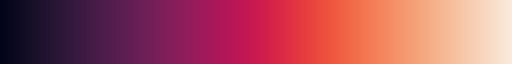

In [124]:
sns.color_palette("rocket", as_cmap=True)

In [122]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

<AxesSubplot:xlabel='duration_min', ylabel='Count'>

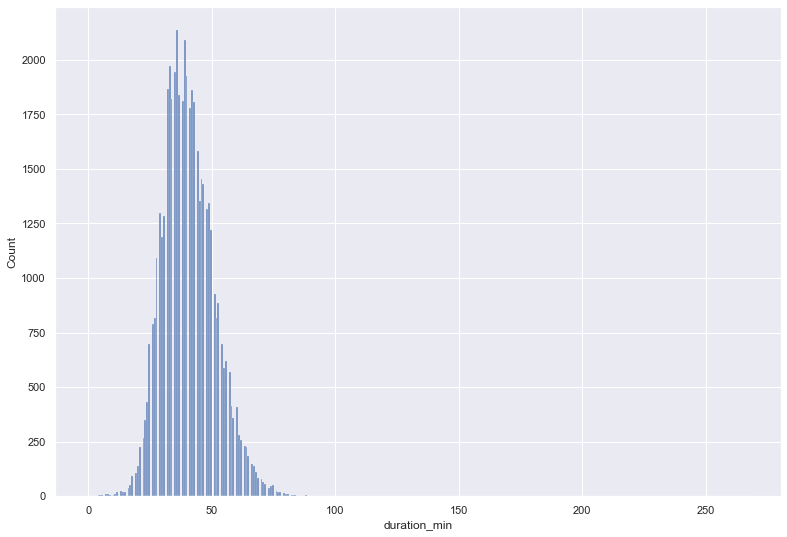

In [188]:
sns.histplot(data=df_match[['duration_min']], x="duration_min", palette = "Set1")

In [140]:
Q3 = np.quantile(df_match['duration_min'], 0.75)
Q1 = np.quantile(df_match['duration_min'], 0.25)
IQR = Q3 - Q1
lowerRange = Q1 - 1.5 * IQR
upperRange = Q3 + 1.5 * IQR

In [141]:
lowerRange, upperRange

(12.0, 68.0)

In [143]:
dfIqr = df_match[df_match['duration_min'].between(lowerRange, upperRange)]

<AxesSubplot:xlabel='duration_min', ylabel='Count'>

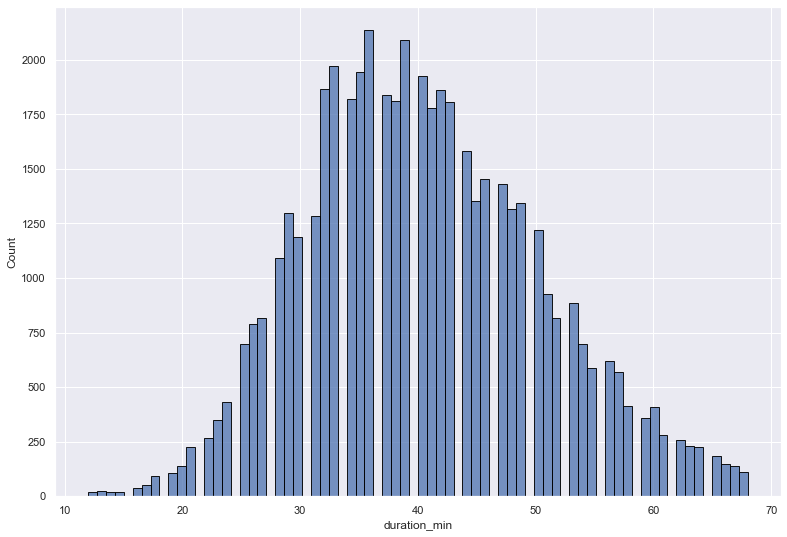

In [189]:
sns.histplot(data=dfIqr[['duration_min']], x="duration_min", palette = "Set2", edgecolor = "black")

### Hero popularity

In [170]:
df_hero_names.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [158]:
df_players.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,level,leaver_status,xp_hero,xp_creep,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,unit_order_none,unit_order_move_to_position,unit_order_move_to_target,unit_order_attack_move,unit_order_attack_target,unit_order_cast_position,unit_order_cast_target,unit_order_cast_target_tree,unit_order_cast_no_target,unit_order_cast_toggle,unit_order_hold_position,unit_order_train_ability,unit_order_drop_item,unit_order_give_item,unit_order_pickup_item,unit_order_pickup_rune,unit_order_purchase_item,unit_order_sell_item,unit_order_disassemble_item,unit_order_move_item,unit_order_cast_toggle_auto,unit_order_stop,unit_order_taunt,unit_order_buyback,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143,180,37,73,56,108,0,16,0,8840.0,5440.0,NaN,83.0,50.0,-957.0,NaN,NaN,212.0,3120.0,5145.0,1087.0,400.0,NaN,NaN,4070.0,1.0,25.0,416.0,51.0,144.0,3.0,71.0,NaN,188.0,16.0,NaN,NaN,NaN,2.0,35.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423,46,63,119,102,24,108,22,0,14331.0,8440.0,2683.0,671.0,395.0,-1137.0,NaN,NaN,1650.0,3299.0,6676.0,4317.0,937.0,NaN,NaN,5894.0,214.0,165.0,1031.0,98.0,39.0,4.0,439.0,NaN,346.0,22.0,NaN,NaN,12.0,52.0,30.0,4.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399,48,60,59,108,65,0,17,0,6692.0,8112.0,NaN,453.0,259.0,-1436.0,-1015.0,NaN,NaN,3142.0,2418.0,3697.0,400.0,NaN,NaN,7053.0,3.0,132.0,645.0,36.0,160.0,20.0,373.0,NaN,643.0,17.0,5.0,NaN,7.0,8.0,28.0,NaN,1.0,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,19,6,271,None,14832,2714,6055,63,147,154,164,79,160,21,0,8583.0,14230.0,894.0,293.0,100.0,-2156.0,NaN,NaN,938.0,4714.0,4104.0,10432.0,400.0,NaN,NaN,4712.0,133.0,163.0,690.0,9.0,15.0,7.0,406.0,NaN,150.0,21.0,NaN,NaN,1.0,9.0,45.0,7.0,NaN,14.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,17,13,245,None,33740,243,1833,114,92,147,0,137,63,24,0,15814.0,14325.0,NaN,62.0,NaN,-1437.0,-1056.0,NaN,4194.0,3217.0,7467.0,9220.0,400.0,NaN,NaN,3853.0,7.0,7.0,1173.0,31.0,84.0,8.0,198.0,NaN,111.0,23.0,1.0,NaN,NaN,2.0,44.0,6.0,NaN,13.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
df_heros_in_match = df_players.groupby('match_id')['hero_id'].apply(list)

In [176]:
def find_populatity(hero_id):
    total = df_heros_in_match.map(lambda x: 1 if hero_id in x else 0).sum()
    percentage = total / len(df_heros_in_match)
    return percentage * 100

In [178]:
df_hero_names['percentage'] = df_hero_names.apply(lambda x: find_populatity(x['hero_id']), axis = 1)

In [184]:
df_hero_names.sort_values(by=['percentage'], ascending=False)[['localized_name', 'percentage']].head(10)

,localized_name,percentage
20,Windranger,41.762
10,Shadow Fiend,34.014
72,Invoker,23.352
6,Earthshaker,22.646
26,Slardar,22.362
37,Queen of Pain,21.180
7,Juggernaut,20.788
98,Tusk,20.612
71,Alchemist,19.646
13,Pudge,18.894


### Hero win rate

In [185]:
df_match.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster,duration_min
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155,39
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154,43
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132,45
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191,51
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156,31


In [ ]:
df_match

In [191]:
df_players.head(10)

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,level,leaver_status,xp_hero,xp_creep,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,unit_order_none,unit_order_move_to_position,unit_order_move_to_target,unit_order_attack_move,unit_order_attack_target,unit_order_cast_position,unit_order_cast_target,unit_order_cast_target_tree,unit_order_cast_no_target,unit_order_cast_toggle,unit_order_hold_position,unit_order_train_ability,unit_order_drop_item,unit_order_give_item,unit_order_pickup_item,unit_order_pickup_rune,unit_order_purchase_item,unit_order_sell_item,unit_order_disassemble_item,unit_order_move_item,unit_order_cast_toggle_auto,unit_order_stop,unit_order_taunt,unit_order_buyback,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143,180,37,73,56,108,0,16,0,8840.0,5440.0,NaN,83.0,50.0,-957.0,NaN,NaN,212.0,3120.0,5145.0,1087.0,400.0,NaN,NaN,4070.0,1.0,25.0,416.0,51.0,144.0,3.0,71.0,NaN,188.0,16.0,NaN,NaN,NaN,2.0,35.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423,46,63,119,102,24,108,22,0,14331.0,8440.0,2683.0,671.0,395.0,-1137.0,NaN,NaN,1650.0,3299.0,6676.0,4317.0,937.0,NaN,NaN,5894.0,214.0,165.0,1031.0,98.0,39.0,4.0,439.0,NaN,346.0,22.0,NaN,NaN,12.0,52.0,30.0,4.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399,48,60,59,108,65,0,17,0,6692.0,8112.0,NaN,453.0,259.0,-1436.0,-1015.0,NaN,NaN,3142.0,2418.0,3697.0,400.0,NaN,NaN,7053.0,3.0,132.0,645.0,36.0,160.0,20.0,373.0,NaN,643.0,17.0,5.0,NaN,7.0,8.0,28.0,NaN,1.0,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,19,6,271,None,14832,2714,6055,63,147,154,164,79,160,21,0,8583.0,14230.0,894.0,293.0,100.0,-2156.0,NaN,NaN,938.0,4714.0,4104.0,10432.0,400.0,NaN,NaN,4712.0,133.0,163.0,690.0,9.0,15.0,7.0,406.0,NaN,150.0,21.0,NaN,NaN,1.0,9.0,45.0,7.0,NaN,14.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,17,13,245,None,33740,243,1833,114,92,147,0,137,63,24,0,15814.0,14325.0,NaN,62.0,NaN,-1437.0,-1056.0,NaN,4194.0,3217.0,7467.0,9220.0,400.0,NaN,NaN,3853.0,7.0,7.0,1173.0,31.0,84.0,8.0,198.0,NaN,111.0,23.0,1.0,NaN,NaN,2.0,44.0,6.0,NaN,13.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
5,0,4,106,128,476,12285,397,524,5,6,8,5,162,None,10725,0,112,145,73,149,48,212,0,19,0,8502.0,12259.0,NaN,1.0,NaN,-2394.0,-2240.0,NaN,200.0,320.0,5281.0,6193.0,NaN,NaN,NaN,6593.0,166.0,76.0,832.0,196.0,3.0,5.0,96.0,2.0,161.0,19.0,NaN,NaN,2.0,NaN,36.0,3.0,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
6,0,0,102,129,317,10355,303,369,4,13,5,2,107,None,15028,764,0,50,11,102,36,185,81,16,0,5201.0,9417.0,NaN,1.0,NaN,-3287.0,NaN,NaN,262.0,320.0,3396.0,4356.0,NaN,NaN,NaN,3325.0,63.0,100.0,609.0,13.0,173.0,14.0,168.0,NaN,118.0,16.0,NaN,NaN,1.0,1.0,43.0,3.0,NaN,13.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,0,5,46,130,2390,13395,452,517,4,8,6,31,208,None,10230,0,2438,41,63,36,147,168,21,19,0,6853.0,13396.0,NaN,244.0,107.0,-3682.0,NaN,NaN,242.0,695.0,4350.0,8797.0,NaN,NaN,NaN,13557.0,11.0,214.0,3386.0,122.0,NaN,3.0,506.0,NaN,491.0,18.0,2.0,3.0,18.0,18.0,30.0,1.0,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,110.0,NaN,NaN,NaN,NaN,NaN
8,0,0,7,131,475,5035,189,223,1,14,8,0,27,67.0277,4774,0,0,36,0,0,46,0,180,12,0,4798.0,4038.0,NaN,27.0,NaN,-3286.0,-39.0,NaN,NaN,320.0,2127.0,1089.0,NaN,NaN,NaN,2217.0,55.

In [ ]:
df_heros_in_match = df_players.groupby('match_id')['hero_id'].apply(list)